In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime


In [2]:
df= pd.read_csv('cabride.csv')

In [3]:
pd.set_option=('display.max_rows',None)

In [4]:
df.head(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [5]:
df.tail(15)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1140,12/29/2016 18:59,12/29/2016 19:14,Business,Kar?chi,Unknown Location,3.0,Meal/Entertain
1141,12/29/2016 19:50,12/29/2016 20:10,Business,Unknown Location,Kar?chi,4.1,Customer Visit
1142,12/29/2016 20:15,12/29/2016 20:45,Business,Kar?chi,Kar?chi,7.2,Meeting
1143,12/29/2016 20:53,12/29/2016 21:42,Business,Kar?chi,Unknown Location,6.4,NaN
1144,12/29/2016 23:14,12/29/2016 23:47,Business,Unknown Location,Kar?chi,12.9,Meeting
1145,12/30/2016 10:15,12/30/2016 10:33,Business,Kar?chi,Kar?chi,2.8,Errand/Supplies
1146,12/30/2016 11:31,12/30/2016 11:56,Business,Kar?chi,Kar?chi,2.9,Errand/Supplies
1147,12/30/2016 15:41,12/30/2016 16:03,Business,Kar?chi,Kar?chi,4.6,Errand/Supplies
1148,12/30/2016 16:45,12/30/2016 17:08,Business,Kar?chi,Kar?chi,4.6,Meeting
1149,12/30/2016 23:06,12/30/2016 23:10,Business,Kar?chi,Kar?chi,0.8,Customer Visit


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [7]:
# changing column names
df.rename(columns={'START_DATE*': 'START_DATE',
                   'END_DATE*' :'END_DATE',
                  'CATEGORY*' :'CATEGORY',
                  'START*' :'START',
                  'STOP*' : 'STOP',
                  'MILES*' : 'MILES',
                  'PURPOSE*' : 'PURPOSE'}, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [9]:
# converting all object datatypes to string so that value_count() can be applied - input for encoding strategy
df.convert_dtypes().dtypes
#alternate way to do the same thing
#df[['CATEGORY*','START*','STOP*','PURPOSE*']] = df[['CATEGORY*','START*','STOP*','PURPOSE*']].astype(str)


START_DATE     string
END_DATE       string
CATEGORY       string
START          string
STOP           string
MILES         float64
PURPOSE        string
dtype: object

In [10]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [11]:
df['PURPOSE'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: PURPOSE, dtype: int64

In [12]:
df['START'].value_counts()

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Ingleside             1
Eastgate              1
El Cerrito            1
Rose Hill             1
Sunnyvale             1
Name: START, Length: 177, dtype: int64

In [13]:
df['STOP'].value_counts()

Cary                       203
Unknown Location           149
Morrisville                 84
Whitebridge                 65
Islamabad                   58
                          ... 
Ingleside                    1
Briar Meadow                 1
Wake Forest                  1
Pontchartrain Beach          1
Depot Historic District      1
Name: STOP, Length: 188, dtype: int64

# one hot encoding with multiple categories can be applied to start and stop and purpose( after replacing nan) column

In [14]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [15]:
df.nunique()

START_DATE    1154
END_DATE      1154
CATEGORY         2
START          177
STOP           188
MILES          256
PURPOSE         10
dtype: int64

## Investigation on Startdate and Enddate column 

In [16]:
#converting object to datetime
#df['DataFrame Column'] = pd.to_datetime(df['DataFrame Column'], format=specify your format)
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

In [17]:
# validating the change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [18]:
df.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

In [19]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [17]:
df['START_DATE'].dt.hour.head()


0    21
1     1
2    20
3    17
4    14
Name: START_DATE, dtype: int64

In [18]:
df['START_DATE'].dt.dayofweek.head()

0    4
1    5
2    5
3    1
4    2
Name: START_DATE, dtype: int64

In [19]:
df['Stdate_dow'] = df['START_DATE'].dt.dayofweek

In [20]:
df['Endate_dow'] = df['END_DATE'].dt.dayofweek

In [66]:
df


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Stdate_dow,Endate_dow
0,2016-01-01 21:11:00,2016-01-01 21:17:00,0,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,4,4
1,2016-01-02 01:25:00,2016-01-02 01:37:00,0,Fort Pierce,Fort Pierce,5.0,NaN,5,5
2,2016-01-02 20:25:00,2016-01-02 20:38:00,0,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,5,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,0,Fort Pierce,Fort Pierce,4.7,Meeting,1,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,0,Fort Pierce,West Palm Beach,63.7,Customer Visit,2,2
...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,0,Kar?chi,Kar?chi,0.7,Meeting,5,5
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,0,Kar?chi,Unknown Location,3.9,Temporary Site,5,5
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,0,Unknown Location,Unknown Location,16.2,Meeting,5,5
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,0,Katunayake,Gampaha,6.4,Temporary Site,5,5


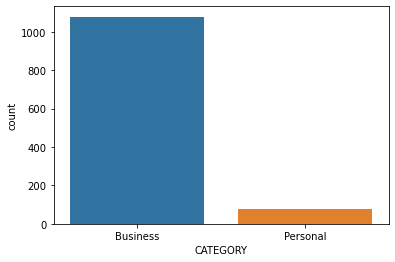

In [22]:
# investigating on category of journey
sns.countplot(x='CATEGORY',data = df)
# Buisness rides are much more than personal rides.

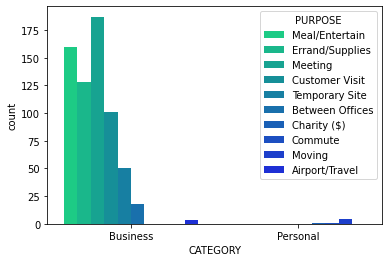

In [28]:
sns.countplot(x='CATEGORY', hue='PURPOSE', data = df, palette='winter_r')

In [29]:
df['PURPOSE'].unique()

array(['Meal/Entertain', nan, 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [30]:

df['PURPOSE'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: PURPOSE, dtype: int64

In [31]:
df['START'].value_counts()

Cary                          201
Unknown Location              148
Morrisville                    85
Whitebridge                    68
Islamabad                      57
                             ... 
Nugegoda                        1
Chalmette                       1
Mebane                          1
Townes at Everett Crossing      1
Ingleside                       1
Name: START, Length: 177, dtype: int64

In [32]:
df['STOP'].value_counts()

Cary                       203
Unknown Location           149
Morrisville                 84
Whitebridge                 65
Islamabad                   58
                          ... 
Stonewater                   1
Nugegoda                     1
Depot Historic District      1
Washington                   1
Hog Island                   1
Name: STOP, Length: 188, dtype: int64

### INVESTIGATION ON PURPOSE COLUMN HAVING NULL VALUE

In [35]:
# create df1 = all null purpose data
# to see all rows that has null value in PURPOSE COLUMN
df1 = df[df.filter(like='PURPOSE').isnull().any(1)]


In [36]:
df1

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
32,2016-01-19 09:09:00,2016-01-19 09:23:00,Business,Whitebridge,Lake Wellingborough,7.2,NaN
85,2016-02-09 10:54:00,2016-02-09 11:07:00,Personal,Whitebridge,Northwoods,5.3,NaN
86,2016-02-09 11:43:00,2016-02-09 11:50:00,Personal,Northwoods,Tanglewood,3.0,NaN
87,2016-02-09 13:36:00,2016-02-09 13:52:00,Personal,Tanglewood,Preston,5.1,NaN
...,...,...,...,...,...,...,...
1065,2016-12-19 14:18:00,2016-12-19 14:32:00,Business,Unknown Location,Unknown Location,5.3,NaN
1066,2016-12-19 14:37:00,2016-12-19 14:50:00,Business,Unknown Location,Unknown Location,5.4,NaN
1069,2016-12-19 19:05:00,2016-12-19 19:17:00,Business,Islamabad,Unknown Location,2.2,NaN
1071,2016-12-20 08:49:00,2016-12-20 09:24:00,Business,Unknown Location,Rawalpindi,12.0,NaN


In [37]:
df1['CATEGORY'].value_counts()

Business    431
Personal     71
Name: CATEGORY, dtype: int64

In [38]:
df1.loc[ : ,'START':'MILES']

,START,STOP,MILES
1,Fort Pierce,Fort Pierce,5.0
32,Whitebridge,Lake Wellingborough,7.2
85,Whitebridge,Northwoods,5.3
86,Northwoods,Tanglewood,3.0
87,Tanglewood,Preston,5.1
...,...,...,...
1065,Unknown Location,Unknown Location,5.3
1066,Unknown Location,Unknown Location,5.4
1069,Islamabad,Unknown Location,2.2
1071,Unknown Location,Rawalpindi,12.0


In [39]:
df1['START'].value_counts()

Unknown Location       93
Islamabad              42
Cary                   40
Whitebridge            32
Morrisville            31
                       ..
Pontchartrain Beach     1
Palo Alto               1
Arlington               1
Heritage Pines          1
Red River District      1
Name: START, Length: 106, dtype: int64

In [46]:
df.loc[df.START=='Unknown Location', : ].PURPOSE.value_counts()

Meeting            18
Errand/Supplies    14
Temporary Site     13
Customer Visit      4
Meal/Entertain      4
Airport/Travel      2
Name: PURPOSE, dtype: int64

In [47]:
df.loc[df.START=='Islamabad', : ].PURPOSE.value_counts()

Temporary Site     6
Errand/Supplies    3
Customer Visit     2
Meal/Entertain     2
Meeting            2
Name: PURPOSE, dtype: int64

In [48]:
df.loc[df.START=='Cary', : ].PURPOSE.value_counts()

Meeting            59
Meal/Entertain     44
Errand/Supplies    27
Customer Visit     18
Temporary Site     10
Between Offices     2
Moving              1
Name: PURPOSE, dtype: int64

In [49]:
df.loc[df.START=='Whitebridge', : ].PURPOSE.value_counts()

Meal/Entertain     15
Errand/Supplies    10
Meeting             6
Between Offices     3
Customer Visit      2
Name: PURPOSE, dtype: int64

In [50]:
df.loc[df.START=='Morrisville', : ].PURPOSE.value_counts()

Customer Visit     20
Meal/Entertain     18
Errand/Supplies     9
Meeting             3
Between Offices     2
Temporary Site      1
Moving              1
Name: PURPOSE, dtype: int64

In [51]:
df.loc[df.STOP=='Unknown Location', : ].PURPOSE.value_counts()

Meeting            15
Temporary Site     14
Errand/Supplies    11
Meal/Entertain      8
Customer Visit      6
Airport/Travel      2
Name: PURPOSE, dtype: int64

In [53]:
df.loc[df.STOP=='Islamabad', : ].PURPOSE.value_counts()

Errand/Supplies    7
Temporary Site     3
Customer Visit     2
Meeting            2
Name: PURPOSE, dtype: int64

In [54]:
df.loc[df.STOP=='Cary', : ].PURPOSE.value_counts()

Meeting            52
Meal/Entertain     36
Customer Visit     33
Errand/Supplies    24
Between Offices     5
Temporary Site      3
Moving              1
Commute             1
Name: PURPOSE, dtype: int64

In [55]:
df.loc[df.STOP=='Whitebridge', : ].PURPOSE.value_counts()

Errand/Supplies    14
Meal/Entertain     13
Customer Visit      3
Meeting             3
Temporary Site      2
Between Offices     1
Moving              1
Name: PURPOSE, dtype: int64

In [56]:
df.loc[df.STOP=='Morrisville', : ].PURPOSE.value_counts()

Meal/Entertain     28
Meeting            11
Temporary Site      9
Errand/Supplies     7
Customer Visit      4
Moving              1
Name: PURPOSE, dtype: int64

In [36]:
df1['START'].value_counts()

Unknown Location    93
Islamabad           42
Cary                40
Whitebridge         32
Morrisville         31
                    ..
Heritage Pines       1
Wayne Ridge          1
College Avenue       1
Wake Co.             1
Boone                1
Name: START, Length: 106, dtype: int64

In [37]:
df1['STOP'].value_counts()

Unknown Location       93
Cary                   48
Islamabad              44
Whitebridge            28
Morrisville            24
                       ..
Lake Wellingborough     1
San Jose                1
Fort Pierce             1
Mebane                  1
Pontchartrain Beach     1
Name: STOP, Length: 106, dtype: int64

In [38]:
## Purpose null has no link with end day of the journey
df1['Endate_dow'].value_counts()

0    87
4    81
1    80
5    66
2    64
6    62
3    62
Name: Endate_dow, dtype: int64

In [39]:
## Purpose null has no link with start day of the journey
df1['Stdate_dow'].value_counts()

0    87
1    82
4    81
5    67
3    62
2    62
6    61
Name: Stdate_dow, dtype: int64

In [40]:
# seeing whether null Purpose has any relation with start ya stop point
#seeing whether null Purpose has any relation with miles ya time of start/stop/ category point
df['PURPOSE'].value_counts()


Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: PURPOSE, dtype: int64

In [41]:
df.nunique()

START_DATE    1154
END_DATE      1154
CATEGORY         2
START          177
STOP           188
MILES          256
PURPOSE         10
Stdate_dow       7
Endate_dow       7
dtype: int64

In [42]:
df['START'].value_counts()

Cary                          201
Unknown Location              148
Morrisville                    85
Whitebridge                    68
Islamabad                      57
                             ... 
Nugegoda                        1
Chalmette                       1
Mebane                          1
Townes at Everett Crossing      1
Ingleside                       1
Name: START, Length: 177, dtype: int64

In [43]:
df['MILES'].sum()

12204.7

In [44]:

df['MILES'].isnull().sum()

0

In [45]:
# to see whether there is any corelation between day of journey and journey distance 
df.corr()
## allmost all journeys have same start date and end date 

,MILES,Stdate_dow,Endate_dow
MILES,1.000000,0.081122,0.091155
Stdate_dow,0.081122,1.000000,0.994638
Endate_dow,0.091155,0.994638,1.000000


In [46]:
#df[df[df.filter(like='PURPOSE').isnull().any(1)].['START']].value_counts()

In [47]:
df['MILES'].describe()

count    1155.000000
mean       10.566840
std        21.579106
min         0.500000
25%         2.900000
50%         6.000000
75%        10.400000
max       310.300000
Name: MILES, dtype: float64

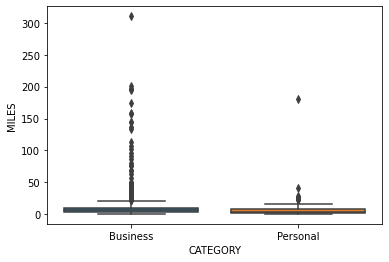

In [48]:
sns.boxplot(x='CATEGORY',y='MILES',data=df)

In [21]:
df['PURPOSE'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: PURPOSE, dtype: int64

In [49]:
df.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Stdate_dow,Endate_dow
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,4,4
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,5,5
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,5,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,1,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2,2
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2,2
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,2,2
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,3,3
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting,6,6
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,6,6


In [50]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['CATEGORY'] = encoder.fit_transform(df['CATEGORY'])

In [51]:
df.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Stdate_dow,Endate_dow
0,2016-01-01 21:11:00,2016-01-01 21:17:00,0,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,4,4
1,2016-01-02 01:25:00,2016-01-02 01:37:00,0,Fort Pierce,Fort Pierce,5.0,NaN,5,5
2,2016-01-02 20:25:00,2016-01-02 20:38:00,0,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,5,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,0,Fort Pierce,Fort Pierce,4.7,Meeting,1,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,0,Fort Pierce,West Palm Beach,63.7,Customer Visit,2,2
5,2016-01-06 17:15:00,2016-01-06 17:19:00,0,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2,2
6,2016-01-06 17:30:00,2016-01-06 17:35:00,0,West Palm Beach,Palm Beach,7.1,Meeting,2,2
7,2016-01-07 13:27:00,2016-01-07 13:33:00,0,Cary,Cary,0.8,Meeting,3,3
8,2016-01-10 08:05:00,2016-01-10 08:25:00,0,Cary,Morrisville,8.3,Meeting,6,6
9,2016-01-10 12:17:00,2016-01-10 12:44:00,0,Jamaica,New York,16.5,Customer Visit,6,6


In [52]:
df.tail(20)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Stdate_dow,Endate_dow
1135,2016-12-29 12:25:00,2016-12-29 12:33:00,0,Kar?chi,Kar?chi,1.4,Errand/Supplies,3,3
1136,2016-12-29 13:17:00,2016-12-29 13:24:00,0,Kar?chi,Kar?chi,1.1,Errand/Supplies,3,3
1137,2016-12-29 13:56:00,2016-12-29 14:11:00,0,Kar?chi,Kar?chi,4.1,Airport/Travel,3,3
1138,2016-12-29 14:42:00,2016-12-29 14:58:00,0,Kar?chi,Kar?chi,6.1,Between Offices,3,3
1139,2016-12-29 15:05:00,2016-12-29 15:16:00,0,Kar?chi,Kar?chi,1.3,Errand/Supplies,3,3
1140,2016-12-29 18:59:00,2016-12-29 19:14:00,0,Kar?chi,Unknown Location,3.0,Meal/Entertain,3,3
1141,2016-12-29 19:50:00,2016-12-29 20:10:00,0,Unknown Location,Kar?chi,4.1,Customer Visit,3,3
1142,2016-12-29 20:15:00,2016-12-29 20:45:00,0,Kar?chi,Kar?chi,7.2,Meeting,3,3
1143,2016-12-29 20:53:00,2016-12-29 21:42:00,0,Kar?chi,Unknown Location,6.4,NaN,3,3
1144,2016-12-29 23:14:00,2016-12-29 23:47:00,0,Unknown Location,Kar?chi,12.9,Meeting,3,3


In [53]:
df['CATEGORY'].value_counts()

0    1078
1      77
Name: CATEGORY, dtype: int64

In [20]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


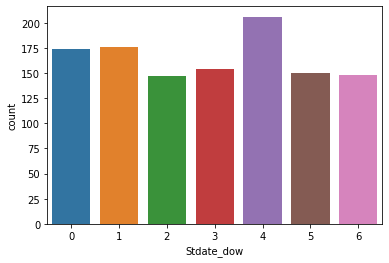

In [55]:
sns.countplot(x='Stdate_dow',data = df)

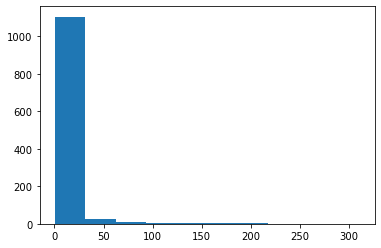

In [56]:
miles_dist = plt.hist(df['MILES'])

In [57]:
df['MILES'].describe()

count    1155.000000
mean       10.566840
std        21.579106
min         0.500000
25%         2.900000
50%         6.000000
75%        10.400000
max       310.300000
Name: MILES, dtype: float64

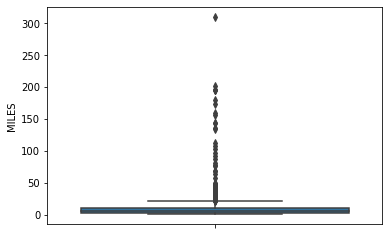

In [58]:
sns.boxplot(y='MILES',data=df)

In [59]:
df2 = df[df.MILES > 20 ]

In [60]:
df2.nunique()

START_DATE    83
END_DATE      83
CATEGORY       2
START         48
STOP          43
MILES         77
PURPOSE        7
Stdate_dow     7
Endate_dow     7
dtype: int64

In [61]:
df2

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Stdate_dow,Endate_dow
4,2016-01-06 14:42:00,2016-01-06 15:49:00,0,Fort Pierce,West Palm Beach,63.7,Customer Visit,2,2
25,2016-01-14 16:29:00,2016-01-14 17:05:00,0,Houston,Houston,21.9,Customer Visit,3,3
36,2016-01-20 13:25:00,2016-01-20 14:19:00,0,Raleigh,Cary,40.2,Customer Visit,2,2
62,2016-02-01 12:10:00,2016-02-01 12:43:00,0,Chapel Hill,Cary,23.3,Customer Visit,0,0
108,2016-02-16 03:21:00,2016-02-16 04:13:00,0,Katunayaka,Unknown Location,43.7,Customer Visit,1,1
...,...,...,...,...,...,...,...,...,...
979,2016-11-20 10:27:00,2016-11-20 11:32:00,0,Cary,Cary,39.2,Between Offices,6,6
1088,2016-12-21 20:56:00,2016-12-21 23:42:00,0,Rawalpindi,Unknown Location,103.0,Meeting,2,2
1089,2016-12-22 15:40:00,2016-12-22 16:38:00,0,Unknown Location,Unknown Location,32.3,Meeting,3,3
1092,2016-12-22 17:56:00,2016-12-22 18:29:00,0,Unknown Location,Unknown Location,23.2,Meeting,3,3
